WHATSAPP CHAT ANALYSIS


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re
from sklearn.cluster import KMeans

!pip install textblob wordcloud

In [ ]:
file_path = 'WhatsApp Chat with Veena Khatri.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

print(data[:10])

['17/10/2024, 15:28 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', '17/10/2024, 16:11 - Veena Khatri: Waiting for this message\n', '17/10/2024, 16:11 - Veena Khatri: <Media omitted>\n', '17/10/2024, 16:11 - Veena Khatri: <Media omitted>\n', '17/10/2024, 16:11 - Veena Khatri: Other people have already received their first bonus for training task .Are you ready to finish and claim bonus ?\n', '\n', '17/10/2024, 16:16 - Veena Khatri: Dear, tell me your age first the I will give you first keyword to search on Google.\n', '17/10/2024, 16:16 - KEVIN A DOBBIN: 27\n', '17/10/2024, 16:16 - Veena Khatri: Okay, let’s start the training task.\n', '17/10/2024, 16:16 - Veena Khatri: First task!\n']


In [ ]:
file_path = 'WhatsApp Chat with 4th Sem MCA A 2023.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

print(data[:10])


['17/10/2024, 15:21 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', '29/07/2024, 23:52 - Shareeba MCA created group "4th Sem MCA "A" 2023"\n', '29/07/2024, 23:52 - You were added\n', '18/10/2024, 12:03 - Sajana MCA SFC: <Media omitted>\n', '18/10/2024, 16:01 - lakshmidevi MCA teacher Sfc: POLL:\n', 'One day trip on 23/10/2024\n', 'OPTION: Wonder la ₹950/head without food (5 votes)\n', 'OPTION: Fun world ₹800/head without food (0 votes)\n', '\n', '18/10/2024, 16:03 - lakshmidevi MCA teacher Sfc: Please vote at the end of the day\n']


DATA PREPROCESSING

In [ ]:
pattern = r"(\d+/\d+/\d+), (\d+:\d+ [APM]+) - (.*?): (.*)"

messages = []
for line in data:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        messages.append([date, time, sender, message])

df = pd.DataFrame(messages, columns=['Date', 'Time', 'Sender', 'Message'])

df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.time

df.head()

,Date,Time,Sender,Message


 Exploratory Data Analysis (EDA)

a. Message Count by Sender

In [ ]:
import pandas as pd
import seaborn as sns  # Retain seaborn if you plan to use it later for visualizations

# Function to read WhatsApp chat data from a text file and return a DataFrame
def read_chat_data(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            chat_data = file.readlines()
    except UnicodeDecodeError:
        # Retry with a different encoding if UTF-8 fails
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            chat_data = file.readlines()

    messages = []
    for line in chat_data:
        if ',' in line:  # Example split logic
            date, message = line.split(',', 1)
            sender = message.strip().split(':')[0]  # Extract sender
            messages.append({
                'Date': date.strip(),
                'Message': message.strip(),
                'Sender': sender
            })
    return pd.DataFrame(messages)

# File paths to the WhatsApp chats (assumed to be in the current working directory)
file_path_veena = 'WhatsApp Chat with Veena Khatri.txt'  # Update this path if needed
file_path_mca = 'WhatsApp Chat with 4th Sem MCA A 2023.txt'  # Update this path if needed

# Read chat data
_df_veena = read_chat_data(file_path_veena)
_df_mca = read_chat_data(file_path_mca)

# Combine the two DataFrames for analysis
_df_veena['Chat'] = 'WhatsApp Chat with Veena Khatri'
_df_mca['Chat'] = 'WhatsApp Chat with 4th Sem MCA A 2023'

combined_df = pd.concat([_df_veena, _df_mca])

# Message count by sender
message_count = combined_df['Sender'].value_counts()

# Display the message count for each sender
print(message_count)


Sender
16                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      37
17                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       6
23                                         

b. Messages Over Time

In [ ]:
import pandas as pd

# Function to read WhatsApp chat data from a text file and return a DataFrame
def read_chat_data(file_path):
    messages = []
    with open(file_path, 'r', encoding='utf-8') as file:
        chat_data = file.readlines()

    for line in chat_data:
        # Assuming the line starts with a date and is followed by the sender and message
        if ',' in line:  # Check for a comma to identify valid lines
            try:
                date, rest = line.split(',', 1)  # Split date from the rest of the message
                sender, message = rest.split(':', 1)  # Extract sender and message
                messages.append({
                    'Date': date.strip(),
                    'Message': message.strip(),
                    'Sender': sender.strip()
                })
            except ValueError:
                continue  # Skip lines that don't match the expected format
    return pd.DataFrame(messages)

# File paths to the WhatsApp chats (assumed to be in the current working directory)
file_path_veena = 'WhatsApp Chat with Veena Khatri.txt'  # Update this path if needed
file_path_mca = 'WhatsApp Chat with 4th Sem MCA A 2023.txt'  # Update this path if needed

# Read chat data
_df_veena = read_chat_data(file_path_veena)
_df_mca = read_chat_data(file_path_mca)

# Combine the two DataFrames for analysis
_df_veena['Chat'] = 'WhatsApp Chat with Veena Khatri'
_df_mca['Chat'] = 'WhatsApp Chat with 4th Sem MCA A 2023'

combined_df = pd.concat([_df_veena, _df_mca], ignore_index=True)

# Convert 'Date' column to datetime, specifying dayfirst=True
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce', dayfirst=True)

# Drop rows with invalid dates
combined_df.dropna(subset=['Date'], inplace=True)

# Message count by sender
message_count = combined_df['Sender'].value_counts().reset_index()  # Get message counts
message_count.columns = ['Sender', 'Message Count']  # Rename columns for clarity

# Print the message count DataFrame
print(message_count)


   Sender  Message Count
0      16             37
1      17              6
2      23              4
3      15              3
4      13              3
5      14              2
6      12              1
7      18              1
8      05              1
9      08              1
10     11              1
11     21              1
12     07              1
13     09              1


c. Word Cloud of Most Common Words

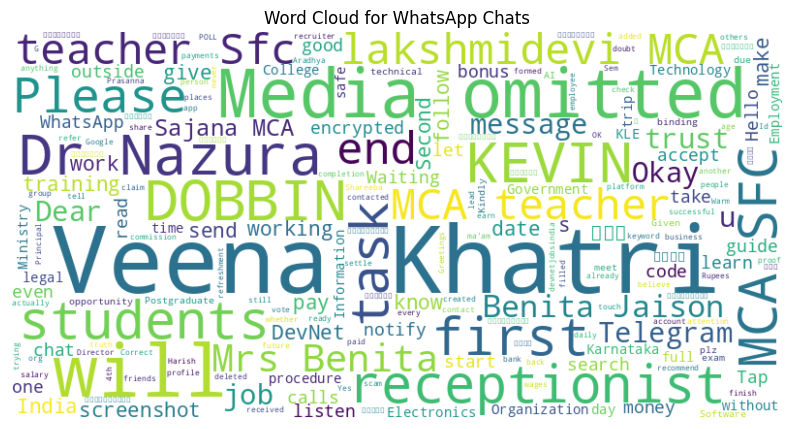

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Function to read WhatsApp chat data from a text file and return a DataFrame
def read_chat_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        chat_data = file.readlines()

    messages = []
    for line in chat_data:
        if ',' in line:  # Example split logic
            date, message = line.split(',', 1)
            messages.append({'Date': date.strip(), 'Message': message.strip(), 'Sender': message.strip().split(':')[0]})  # Extract sender
    return pd.DataFrame(messages)

# File paths to the WhatsApp chats (assumed to be in the current working directory)
file_path_veena = 'WhatsApp Chat with Veena Khatri.txt'  # Update this path if needed
file_path_mca = 'WhatsApp Chat with 4th Sem MCA A 2023.txt'  # Update this path if needed

# Read chat data
_df_veena = read_chat_data(file_path_veena)
_df_mca = read_chat_data(file_path_mca)

# Combine the two DataFrames for analysis
_df_veena['Chat'] = 'WhatsApp Chat with Veena Khatri'
_df_mca['Chat'] = 'WhatsApp Chat with 4th Sem MCA A 2023'

combined_df = pd.concat([_df_veena, _df_mca])

# Filter out messages that are empty or NaN
df_filtered = combined_df['Message'].dropna()
df_filtered = df_filtered[df_filtered.str.len() > 0]

# Combine all messages into a single string
all_messages = ' '.join(df_filtered)

# Generate the word cloud
if all_messages.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for WhatsApp Chats')
    plt.show()
else:
    print("No valid messages to generate word cloud.")


5. Sentiment Analysis

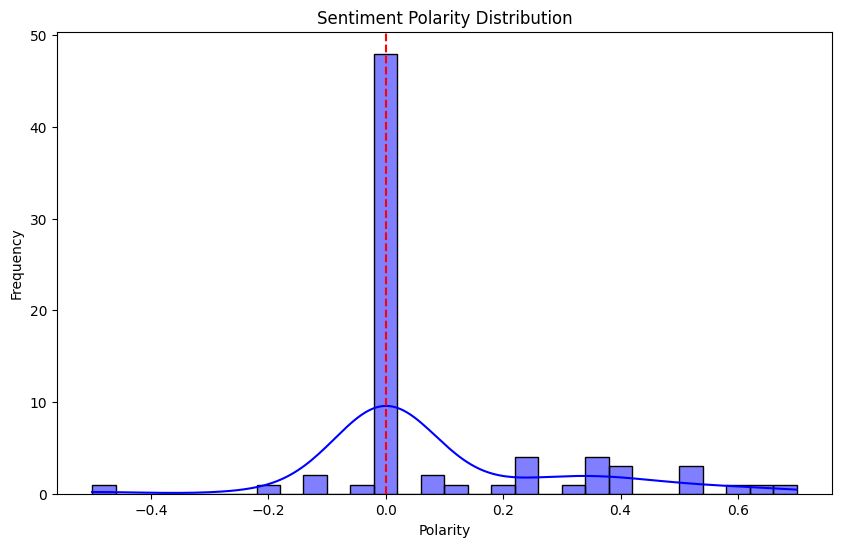

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Function to read WhatsApp chat data from a text file and return a DataFrame
def read_chat_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        chat_data = file.readlines()

    messages = []
    for line in chat_data:
        if ',' in line:  # Example split logic
            date, message = line.split(',', 1)
            messages.append({'Date': date.strip(), 'Message': message.strip()})
    return pd.DataFrame(messages)

# File paths to the WhatsApp chats (update these paths accordingly)
file_path_veena = 'WhatsApp Chat with Veena Khatri.txt'  # Path to Veena's chat file
file_path_mca = 'WhatsApp Chat with 4th Sem MCA A 2023.txt'  # Path to MCA mentees' chat file

# Read chat data
_df_veena = read_chat_data(file_path_veena)
_df_mca = read_chat_data(file_path_mca)

# Add a column to identify the source chat
_df_veena['Chat'] = 'WhatsApp Chat with Veena Khatri'
_df_mca['Chat'] = 'WhatsApp Chat with 4th Sem MCA A 2023'

# Combine the two DataFrames for analysis
combined_df = pd.concat([_df_veena, _df_mca])

# Calculate sentiment polarity for each message
combined_df['Polarity'] = combined_df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting the sentiment polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Polarity'], bins=30, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Optional: line at Polarity = 0 for reference
plt.show()


6. Clustering Based on Message Length (Optional)

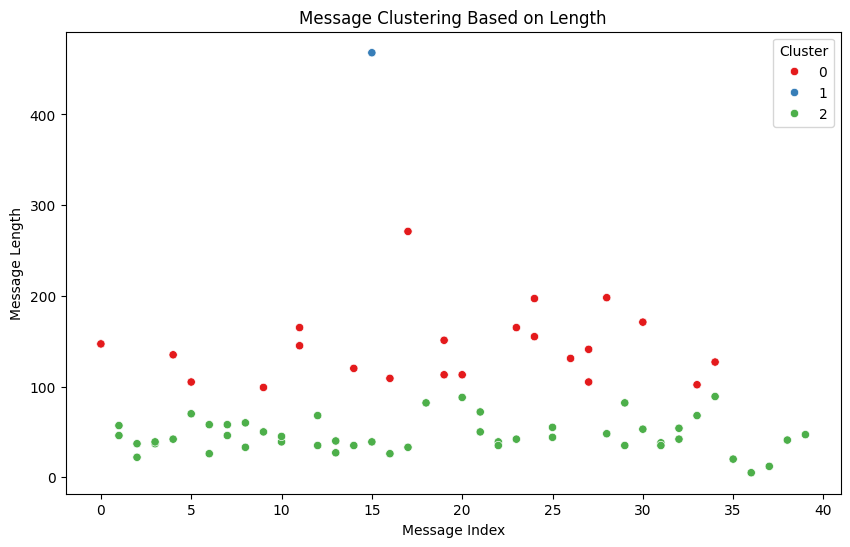

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Function to read WhatsApp chat data from a text file and return a DataFrame
def read_chat_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        chat_data = file.readlines()

    messages = []
    for line in chat_data:
        if ',' in line:  # Example split logic
            date, message = line.split(',', 1)
            messages.append({'Date': date.strip(), 'Message': message.strip()})
    return pd.DataFrame(messages)

# File paths to the WhatsApp chats (update these paths accordingly)
file_path_veena = 'WhatsApp Chat with Veena Khatri.txt'  # Path to Veena's chat file
file_path_mca = 'WhatsApp Chat with 4th Sem MCA A 2023.txt'  # Path to MCA mentees' chat file

# Read chat data
_df_veena = read_chat_data(file_path_veena)
_df_mca = read_chat_data(file_path_mca)

# Add a column to identify the source chat
_df_veena['Chat'] = 'WhatsApp Chat with Veena Khatri'
_df_mca['Chat'] = 'WhatsApp Chat with 4th Sem MCA A 2023'

# Combine the two DataFrames for analysis
combined_df = pd.concat([_df_veena, _df_mca])

# Filter valid messages
df_filtered = combined_df['Message'].dropna()
df_filtered = df_filtered[df_filtered.str.len() > 0]

# Convert the filtered Series to a DataFrame
df_filtered = df_filtered.to_frame()

# Calculate message length
df_filtered['Message Length'] = df_filtered['Message'].apply(len)

# Perform KMeans clustering if there are valid messages
if len(df_filtered) > 0:
    kmeans = KMeans(n_clusters=3)
    df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[['Message Length']])

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_filtered.index, y='Message Length', hue='Cluster', data=df_filtered, palette='Set1')
    plt.title('Message Clustering Based on Length')
    plt.xlabel('Message Index')
    plt.ylabel('Message Length')
    plt.legend(title='Cluster')
    plt.show()
else:
    print("No valid messages to cluster.")


7. Real-Time Data Update (Optional)

Daily Message Counts:
 Date
2024-07-29     2
2024-10-17    35
2024-10-18    10
2024-10-19     1
2024-10-21     1
2024-10-22    10
2024-10-23     4
Name: count, dtype: int64


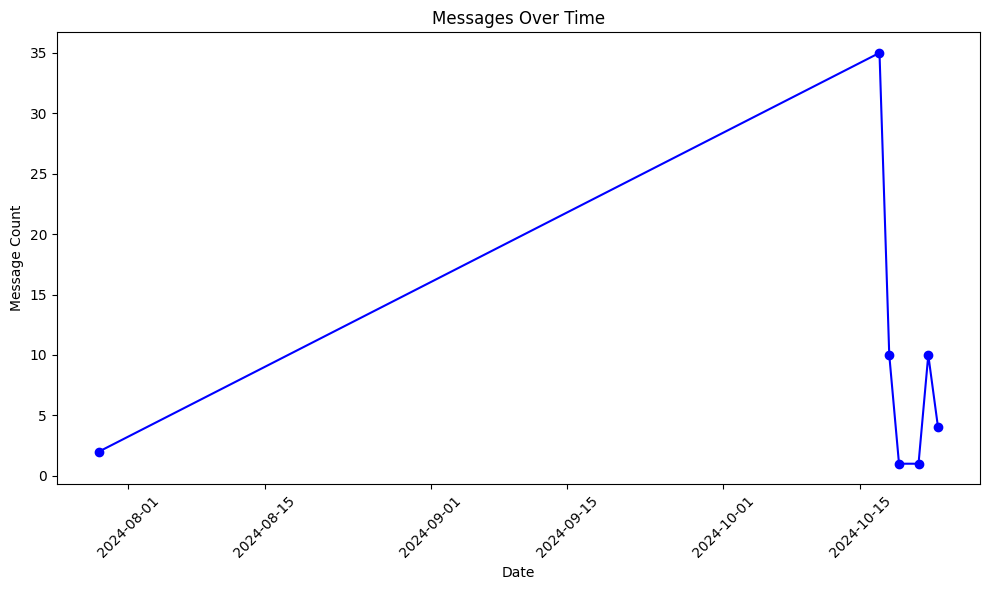

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read WhatsApp chat data from a text file and return a DataFrame
def read_chat_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        chat_data = file.readlines()

    messages = []
    for line in chat_data:
        if ',' in line:  # Example split logic
            date, message = line.split(',', 1)
            messages.append({'Date': date.strip(), 'Message': message.strip()})
    return pd.DataFrame(messages)

# File paths to the WhatsApp chats (update these paths accordingly)
file_path_veena = 'WhatsApp Chat with Veena Khatri.txt'  # Path to Veena's chat file
file_path_mca = 'WhatsApp Chat with 4th Sem MCA A 2023.txt'  # Path to MCA mentees' chat file

# Read chat data
_df_veena = read_chat_data(file_path_veena)
_df_mca = read_chat_data(file_path_mca)

# Add a column to identify the source chat
_df_veena['Chat'] = 'WhatsApp Chat with Veena Khatri'
_df_mca['Chat'] = 'WhatsApp Chat with 4th Sem MCA A 2023'

# Combine the two DataFrames for analysis
combined_df = pd.concat([_df_veena, _df_mca])

# Convert 'Date' to datetime with dayfirst=True
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce', dayfirst=True)
combined_df = combined_df.dropna(subset=['Date'])

# Group by date to count the number of messages each day
daily_message_counts = combined_df['Date'].dt.date.value_counts().sort_index()

# Debugging print to confirm the daily message counts
print("Daily Message Counts:\n", daily_message_counts)

# Set up the figure for the plot
plt.figure(figsize=(10, 6))

# Plotting the message counts
if not daily_message_counts.empty:
    daily_message_counts.plot(kind='line', marker='o', color='b')
else:
    plt.title('No messages to display')

plt.title('Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


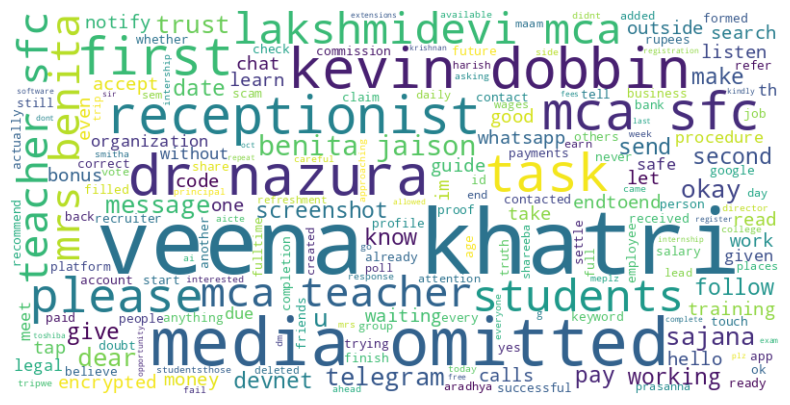

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download the stopwords corpus
nltk.download('stopwords')

# Sample DataFrame creation
#data = {'Sender': ['Alice', 'Bob', 'Alice', 'Bob'],
       # 'Message': ['Hello there!', 'How are you?', 'I am good, thanks!', 'See you later!']}
#combined_df = pd.DataFrame(data)

# Function to clean messages
def clean_message(message):
    message = message.lower()  # Convert to lowercase
    message = re.sub(r'http\S+|www\S+|https\S+', '', message, flags=re.MULTILINE)  # Remove URLs
    message = re.sub(r'[^a-zA-Z\s]', '', message)  # Remove special characters
    return message

# Applying cleaning function
combined_df['Cleaned Message'] = combined_df['Message'].apply(clean_message)

# Remove stop words
stop_words = set(stopwords.words('english'))
combined_df['Filtered Message'] = combined_df['Cleaned Message'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)

# Create a word cloud with filtered messages
all_filtered_messages = ' '.join(combined_df['Filtered Message'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_filtered_messages)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
